# Generate theoretical modes

See Supplementary Information Section 2.1

Requires:
* Numpy
* Matplotlib
* pyMMF (our custom made library to simulate multimode fiber modes available [here](https://github.com/wavefrontshaping/pyMMF)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pyMMF
from functions import colorize

## Parameters

In [14]:
NA = 0.22
radius = 25 # in microns
areaSize = 2.4*radius # calculate the field on an area larger than the diameter of the fiber
n_points_modes = 256 # resolution of the window
n1 = 1.45 # index of refraction at r=0 (maximum)
wl = 1.55 # wavelength in microns
curvature = None
k0 = 2.*np.pi/wl

r_max = 3.2*radius
npoints_search = 2**8
dh = 2*radius/npoints_search

# solver parameters
solver_options = {
    'degenerate_mode': 'exp', # 'eig' or 'prop'
    'min_radius_bc': 1.5,   # min large radial boundary condition
    'N_beta_coarse': 1_000, # number of steps of the initial coarse scan
    'change_bc_radius_step': 0.95, #change of the large radial boundary condition if fails 
    'dh': dh,               # radial resolution during the computation
    'r_max': r_max,         # max radius to calculate (and first try for large radial boundary condition)
}

## Simulate a graded index fiber

In [15]:
def get_modes(npoints):
    profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)
    profile.initParabolicGRIN(n1=n1,a=radius,NA=NA)

    solver = pyMMF.propagationModeSolver()
    solver.setIndexProfile(profile)
    solver.setWL(wl)
    modes = solver.solve(solver='radial',
                        curvature = None,
                        options = solver_options
                        )
    return modes

modes = get_modes(n_points_modes)

2025-05-09 15:39:54,013 - pyMMF.core [DEBUG  ]  Debug mode ON.
2025-05-09 15:39:54,014 - pyMMF.solv [INFO   ]  Searching for modes with beta_min=5.8097702917872995, beta_max=5.877818513168
2025-05-09 15:39:54,023 - pyMMF.solv [INFO   ]  Found 6 radial mode(s) for m=0
2025-05-09 15:39:54,024 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2025-05-09 15:39:54,024 - pyMMF.solv [ERROR  ]  Field limit -1.0 at the founded beta=0.06197713390534289 is greater than field_limit_tol=0.001
2025-05-09 15:39:54,025 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2025-05-09 15:39:54,025 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.04a
2025-05-09 15:39:54,027 - pyMMF.solv [ERROR  ]  Field limit -1.0 at the founded beta=0.06197713390534289 is greater than field_limit_tol=0.001
2025-05-09 15:39:54,028 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2025-05-09 15:39:54,029 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.89a
2025-05-09 15:39:

### Dispersion

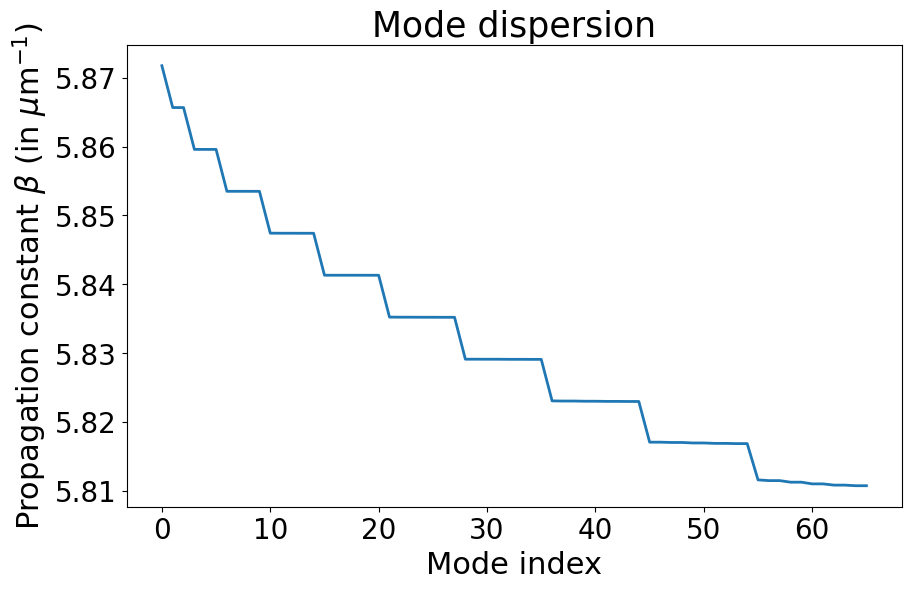

In [ ]:
# sort modes by decreasing propagation constant
modes.sort()

plt.figure(figsize=(10,6)); 
plt.plot((np.real(modes.betas)),
         linewidth=2.)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'Mode dispersion' ,fontsize = 25)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 22)
plt.xlabel(r'Mode index', fontsize = 22)
plt.show()

## Show some modes

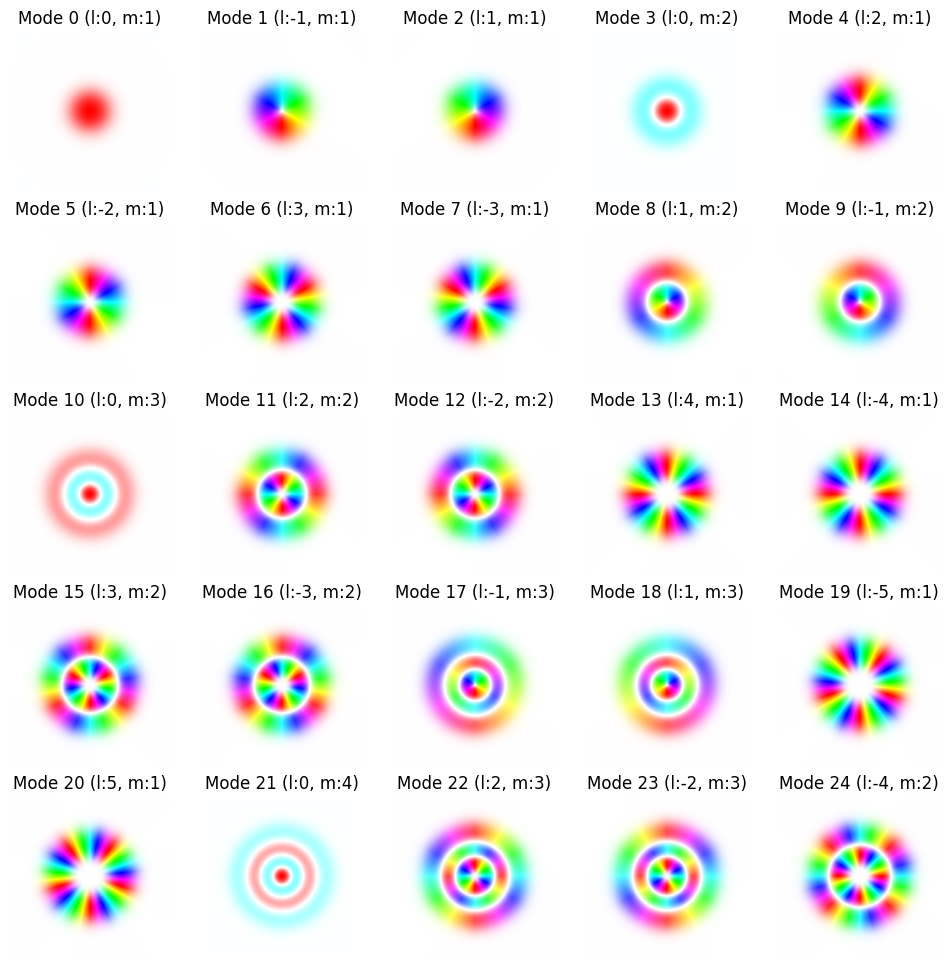

In [28]:
i_modes = [0,1,5,10,15,25,35]

M0 = modes.getModeMatrix()

fig = plt.figure(figsize=(12, 12))
columns = 5
rows = 5

for i in range(columns*rows):
    Mi = M0[...,i]
    profile = Mi.reshape([n_points_modes]*2)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(colorize(profile,'white'))
    plt.axis('off')
    plt.title(f'Mode {i} (l:{modes.m[i]}, m:{modes.l[i]})')
    # save figure
    # plt.savefig(f'mode_{i}.svg')
    